In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
ls

BasicModelling.ipynb                 git_environment/
DataAnalytics_dublin_bus_DASK.ipynb  miniconda3/
DataAnalyticsInitialiser.ipynb       Miniconda3-latest-Linux-x86_64.sh*
datafile.tar.gz                      tmp/


In [3]:
cd tmp

/home/team9/tmp


In [4]:
ls

data/


In [5]:
cd data

/home/team9/tmp/data


In [6]:
trips = pd.read_csv('rt_trips_DB_2018.txt', sep=";", parse_dates=[1])

In [7]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,"
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2865284,"
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,"
2182635,DB,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3208841,"


In [8]:
trips.describe()

,TRIPID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TENDERLOT,SUPPRESSED,JUSTIFICATIONID
count,2.182637e+06,2.182637e+06,2.182637e+06,2.182637e+06,2.045430e+06,2.018086e+06,0.0,4333.0,4330.000000
mean,7.149479e+06,1.504103e+00,5.507875e+04,5.153329e+04,5.506239e+04,5.170612e+04,NaN,0.0,237554.867667
std,7.314423e+05,4.999833e-01,1.742482e+04,1.757164e+04,1.733870e+04,1.752695e+04,NaN,0.0,34585.051789
min,5.955221e+06,1.000000e+00,1.820300e+04,1.620000e+04,1.754600e+04,1.597400e+04,NaN,0.0,177856.000000
25%,6.592584e+06,1.000000e+00,3.968300e+04,3.600000e+04,3.966800e+04,3.651800e+04,NaN,0.0,205506.500000
50%,7.110090e+06,2.000000e+00,5.527600e+04,5.160000e+04,5.518900e+04,5.161800e+04,NaN,0.0,233851.500000
75%,8.018241e+06,2.000000e+00,6.900600e+04,6.516000e+04,6.901900e+04,6.539800e+04,NaN,0.0,271506.750000
max,8.592207e+06,2.000000e+00,9.168000e+04,8.760000e+04,9.437800e+04,9.717700e+04,NaN,0.0,297899.000000


In [9]:
haveDepTime = trips[trips["ACTUALTIME_DEP"].notnull()]
haveDep_ArrTime = haveDepTime[haveDepTime["ACTUALTIME_ARR"].notnull()]
haveDep_ArrTime

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,"
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,"
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,"
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,"
5,DB,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2966500,"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182629,DB,2018-05-14,6765652,53,53_21,2,30626,29100,30482.0,29119.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024762,"
2182630,DB,2018-05-14,6765662,53,53_21,2,65950,64800,66270.0,64815.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024821,"
2182631,DB,2018-05-14,6765828,45A,45A_68,1,28647,25800,28688.0,25858.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2448734,"
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,"


In [10]:
print(trips.shape[0] - haveDep_ArrTime.shape[0], 'trips are missing either actual departure or arrival times')

289270 trips are missing either actual departure or arrival times


In [11]:
trips.nunique()

DATASOURCE              1
DAYOFSERVICE          360
TRIPID             658964
LINEID                130
ROUTEID               588
DIRECTION               2
PLANNEDTIME_ARR     64461
PLANNEDTIME_DEP       791
ACTUALTIME_ARR      68122
ACTUALTIME_DEP      66771
BASIN                   1
TENDERLOT               0
SUPPRESSED              1
JUSTIFICATIONID      3526
LASTUPDATE            360
NOTE                46690
dtype: int64

- 360 days of service - seems to be one for every day
- only 650k trip IDs but over 2 million lines - need to see why 

In [12]:
trips.loc[trips['TRIPID']==6765486]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE
470885,DB,2018-05-17,6765486,33D,33D_62,2,29460,26400,30676.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:42:42,",3077688,"
2071391,DB,2018-05-18,6765486,33D,33D_62,2,29460,26400,29846.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:52:33,",3077688,"
2172425,DB,2018-05-16,6765486,33D,33D_62,2,29460,26400,30102.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:32:53,",3077688,"
2179562,DB,2018-05-15,6765486,33D,33D_62,2,29460,26400,30403.0,26416.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",3077688,"
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,"


Looks like the trip IDs are sometimes duplicated but on different days. Need to see if they are ever duplicated on the same day

In [13]:
sub_trips = trips[["DAYOFSERVICE", "TRIPID"]]

In [14]:
print(sub_trips.duplicated().sum(), "duplicated trip IDs on the same day.")

0 duplicated trip IDs on the same day.


Therefore trip ID is never reused on the same day.
- Can use it and day as a unique identifier

In [15]:
trips.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
ROUTEID                    object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                      object
TENDERLOT                 float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE                 object
NOTE                       object
dtype: object

Next I will convert the dates to days of the week

In [16]:
trips['DAYOFWEEK'] = trips['DAYOFSERVICE'].dt.weekday

In [17]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",2
1,DB,2018-02-07,6262138,25B,25B_271,2,30517,26460,32752.0,NaN,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2580260,",2
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",2
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",2
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,",0
2182633,DB,2018-05-14,6765469,75,75_17,1,53416,48600,NaN,48823.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2865284,",0
2182634,DB,2018-05-14,6765486,33D,33D_62,2,29460,26400,29904.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3077688,",0
2182635,DB,2018-05-14,6764987,70,70_60,1,65277,60600,66341.0,NaN,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3208841,",0


Next I will determine the hour of departure for the trip and the travel time

In [18]:
# dividing by seconds and minutes
trips['HOUR_DEPARTURE'] = trips['ACTUALTIME_DEP'].apply(lambda row: row//3600)

In [19]:
# getting arrival time minus departure, then dividing by 60 seconds
trips['JOURNEY_TIME'] = (trips['ACTUALTIME_ARR'] - trips['ACTUALTIME_DEP']).apply(lambda row: row/60)

In [20]:
trips['JOURNEY_TIME'].describe()

count    1.893367e+06
mean     6.422932e+01
std      2.391304e+01
min     -2.477667e+02
25%      4.671667e+01
50%      6.286667e+01
75%      8.075000e+01
max      3.909667e+02
Name: JOURNEY_TIME, dtype: float64

Not sure why there would be a negative - will investigate

In [21]:
trips.loc[trips['JOURNEY_TIME']<10]

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
505,DB,2018-09-26,7773427,185,185_57,2,43034,42600,43213.0,42640.0,BasDef,NaN,NaN,NaN,18-OCT-18 18:01:47,",2817941,",2,11.0,9.550000
506,DB,2018-09-26,7773423,185,185_57,2,38234,37800,38349.0,37836.0,BasDef,NaN,NaN,NaN,18-OCT-18 18:01:47,",2817937,",2,10.0,8.550000
1619,DB,2018-06-21,7029435,150,150_8,1,75653,73800,76232.0,83371.0,BasDef,NaN,NaN,NaN,29-JUN-18 15:43:00,",2961346,2961346,",3,23.0,-118.983333
2055,DB,2018-04-11,6627695,185,185_63,2,86179,85500,85696.0,85175.0,BasDef,NaN,NaN,NaN,20-APR-18 14:41:36,",2818175,",2,23.0,8.683333
2583,DB,2018-06-26,7108408,185,185_57,2,57022,56400,56905.0,56308.0,BasDef,NaN,NaN,NaN,04-JUL-18 12:21:00,",2817949,",1,15.0,9.950000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2180303,DB,2018-05-15,6767407,185,185_57,2,38267,37800,38330.0,37819.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",2817937,",1,10.0,8.516667
2180307,DB,2018-05-15,6767414,185,185_51,1,46725,46200,46752.0,46246.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",2817944,",1,12.0,8.433333
2181507,DB,2018-05-15,6763783,33A,33A_27,2,84040,83700,83992.0,83603.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",1734809,",1,23.0,6.483333
2181635,DB,2018-05-15,6766458,46A,46A_73,1,85288,84600,85087.0,84600.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",3067060,",1,23.0,8.116667


Seems as though these rows should be dropped

In [22]:
trips = trips.loc[trips['JOURNEY_TIME']>0]

Below I am creating a new categorical column, with each category representing a route in a particular direction

In [23]:
trips

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
0,DB,2018-02-07,6253783,68,68_80,1,87245,84600,87524.0,84600.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2967409,",2,23.0,48.733333
2,DB,2018-02-07,6254942,45A,45A_70,2,35512,32100,36329.0,32082.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2448968,",2,8.0,70.783333
3,DB,2018-02-07,6259460,25A,25A_273,1,57261,54420,58463.0,54443.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3094242,",2,15.0,67.000000
4,DB,2018-02-07,6253175,14,14_15,1,85383,81600,84682.0,81608.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2526331,",2,22.0,51.233333
5,DB,2018-02-07,6248240,77A,77A_28,2,41648,37200,42019.0,37538.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",2966500,",2,10.0,74.683333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182629,DB,2018-05-14,6765652,53,53_21,2,30626,29100,30482.0,29119.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024762,",0,8.0,22.716667
2182630,DB,2018-05-14,6765662,53,53_21,2,65950,64800,66270.0,64815.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3024821,",0,18.0,24.250000
2182631,DB,2018-05-14,6765828,45A,45A_68,1,28647,25800,28688.0,25858.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",2448734,",0,7.0,47.166667
2182632,DB,2018-05-14,6765849,123,123_36,2,61560,57840,61365.0,57859.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:13:13,",3216350,",0,16.0,58.433333


In [24]:
trips['LINE_DIRECTION'] = trips['LINEID'] + '_' + trips['DIRECTION'].astype(str)

/tmp/ipykernel_29466/2469012108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips['LINE_DIRECTION'] = trips['LINEID'] + '_' + trips['DIRECTION'].astype(str)


In [25]:
trips['LINE_DIRECTION'] = trips['LINE_DIRECTION'].astype('category')

/tmp/ipykernel_29466/1590171041.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trips['LINE_DIRECTION'] = trips['LINE_DIRECTION'].astype('category')


In [26]:
print(len(trips['LINE_DIRECTION'].unique().tolist()),'categories')

252 categories


In [27]:
fortySixA1 = trips.loc[trips['LINE_DIRECTION']=="46A_1"]

In [28]:
fortySixA1

,DATASOURCE,DAYOFSERVICE,TRIPID,LINEID,ROUTEID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,BASIN,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,NOTE,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME,LINE_DIRECTION
15,DB,2018-02-07,6253924,46A,46A_74,1,65768,60960,66075.0,60926.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3059400,",2,16.0,85.816667,46A_1
20,DB,2018-02-07,6262164,46A,46A_74,1,28877,24480,29657.0,24697.0,BasDef,NaN,NaN,NaN,28-FEB-18 12:05:11,",3059412,",2,6.0,82.666667,46A_1
203,DB,2018-03-11,6397655,46A,46A_74,1,86458,83700,87190.0,83653.0,BasDef,NaN,NaN,NaN,19-MAR-18 15:02:59,",2453090,",6,23.0,58.950000,46A_1
204,DB,2018-03-11,6392156,46A,46A_74,1,80158,77400,80661.0,77400.0,BasDef,NaN,NaN,NaN,19-MAR-18 15:02:59,",2453506,",6,21.0,54.350000,46A_1
205,DB,2018-03-11,6392515,46A,46A_74,1,78358,75600,78412.0,75633.0,BasDef,NaN,NaN,NaN,19-MAR-18 15:02:59,",2457913,",6,21.0,46.316667,46A_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2182283,DB,2018-05-15,6763274,46A,46A_74,1,39339,35040,39593.0,35040.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",3061067,",1,9.0,75.883333,46A_1
2182320,DB,2018-05-15,6753808,46A,46A_74,1,62027,57120,61827.0,57111.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",3064343,",1,15.0,78.600000,46A_1
2182458,DB,2018-05-15,6764906,46A,46A_74,1,49598,45120,49279.0,45157.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",2963552,",1,12.0,68.700000,46A_1
2182470,DB,2018-05-15,6762038,46A,46A_74,1,65510,60480,66254.0,60456.0,BasDef,NaN,NaN,NaN,26-JUN-18 09:23:03,",3063207,",1,16.0,96.633333,46A_1


In [29]:
fortySixA1.describe()

,TRIPID,DIRECTION,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,TENDERLOT,SUPPRESSED,JUSTIFICATIONID,DAYOFWEEK,HOUR_DEPARTURE,JOURNEY_TIME
count,3.540300e+04,35403.0,35403.000000,35403.000000,35403.000000,35403.000000,0.0,5.0,5.00000,35403.000000,35403.000000,35403.000000
mean,7.141447e+06,1.0,55239.114990,51209.444962,55522.127277,51228.111911,NaN,0.0,248540.60000,2.726068,13.730644,71.566923
std,7.381219e+05,0.0,16834.233299,17032.972819,16849.504444,17029.002532,NaN,0.0,41860.48756,1.900328,4.730334,14.564284
min,5.955251e+06,1.0,20507.000000,18900.000000,20611.000000,18798.000000,NaN,0.0,204562.00000,0.000000,5.000000,0.316667
25%,6.583712e+06,1.0,40619.000000,36540.000000,40848.000000,36579.000000,NaN,0.0,205718.00000,1.000000,10.000000,62.766667
50%,7.099651e+06,1.0,55280.000000,51000.000000,55650.000000,51006.000000,NaN,0.0,259600.00000,3.000000,14.000000,72.150000
75%,8.019946e+06,1.0,69120.000000,64800.000000,69519.500000,64787.000000,NaN,0.0,275218.00000,4.000000,17.000000,80.866667
max,8.591174e+06,1.0,87162.000000,84600.000000,88928.000000,85047.000000,NaN,0.0,297605.00000,6.000000,23.000000,202.300000


In [30]:
fortySixA1['HOUR_DEPARTURE'] = fortySixA1['HOUR_DEPARTURE'].astype('category')
fortySixA1['DAYOFWEEK'] = fortySixA1['DAYOFWEEK'].astype('category')

/tmp/ipykernel_29466/3778258525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fortySixA1['HOUR_DEPARTURE'] = fortySixA1['HOUR_DEPARTURE'].astype('category')
/tmp/ipykernel_29466/3778258525.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fortySixA1['DAYOFWEEK'] = fortySixA1['DAYOFWEEK'].astype('category')


In [31]:
# setting random state to 0 as does not matter that order is the same each time once its shuffled
# setting test_size to 30%
# using sklearns train_test_split method
train, test = train_test_split(fortySixA1, test_size=0.3, random_state=0)

In [32]:
# resetting the indexes of both to start at 0 (preserves order generated above)
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [33]:
print("Training dataset has", train.shape[0], "rows and test dataset has", test.shape[0], "rows.")

Training dataset has 24782 rows and test dataset has 10621 rows.


In [34]:
# verify datatypes have remained intact
train.dtypes

DATASOURCE                 object
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
LINEID                     object
ROUTEID                    object
DIRECTION                   int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR            float64
ACTUALTIME_DEP            float64
BASIN                      object
TENDERLOT                 float64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE                 object
NOTE                       object
DAYOFWEEK                category
HOUR_DEPARTURE           category
JOURNEY_TIME              float64
LINE_DIRECTION           category
dtype: object

In [48]:
predict_columns = ['HOUR_DEPARTURE', 'DAYOFWEEK']
predictions = [feature for feature in predict_columns]
target = 'JOURNEY_TIME'

In [63]:
# initialise the RandomForestClassifier
# set random state value so that results can be replicated
forestReg = RandomForestRegressor(n_estimators=100, max_depth=100,oob_score=True, random_state=1)

# fit the model on the training set using the predictions features
# y value is now the quantiles
forestReg.fit(train[predictions], train[target])

RandomForestRegressor(max_depth=100, oob_score=True, random_state=1)

In [64]:
feature_importance = pd.DataFrame({'feature': train[predictions].columns, 'importance':forestReg.feature_importances_})
print("\u0332".join("Feature Importance Random Forest Regressor"))
feature_importance.sort_values('importance', ascending=False)

F̲e̲a̲t̲u̲r̲e̲ ̲I̲m̲p̲o̲r̲t̲a̲n̲c̲e̲ ̲R̲a̲n̲d̲o̲m̲ ̲F̲o̲r̲e̲s̲t̲ ̲R̲e̲g̲r̲e̲s̲s̲o̲r


,feature,importance
0,HOUR_DEPARTURE,0.833723
1,DAYOFWEEK,0.166277


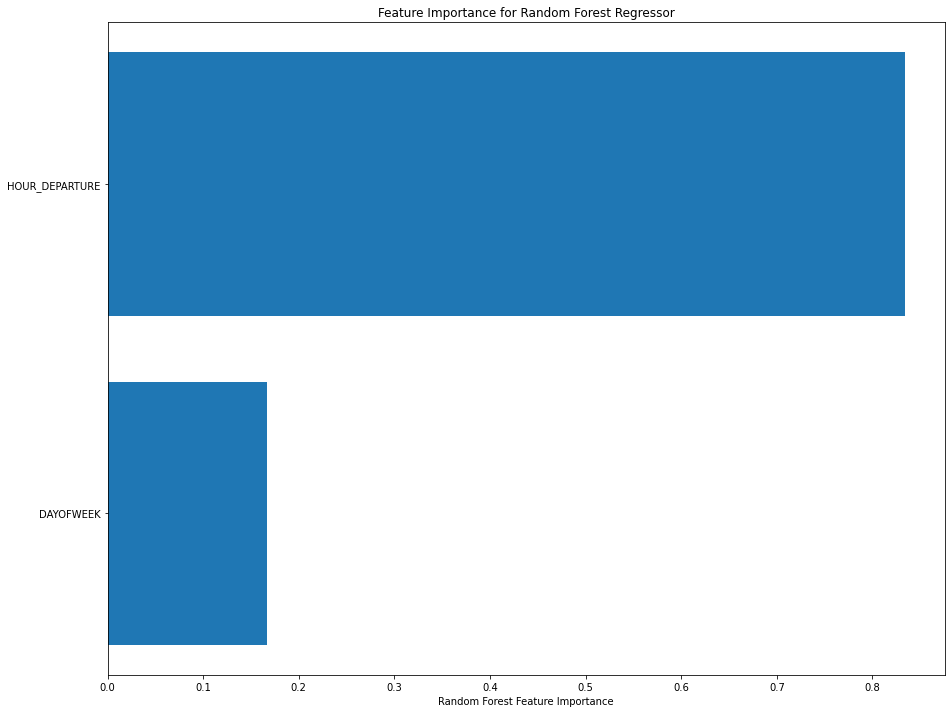

In [65]:
sorted_idx = forestReg.feature_importances_.argsort()
plt.figure(figsize=(15,12))
plt.barh(train[predictions].columns[sorted_idx], forestReg.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance for Random Forest Regressor")
plt.show()

In [66]:
forestRegPredictedTrain10 = forestReg.predict(train[predictions].head(10))
print("First 10 predictions with Random Forest Regression:")
predicted_df_train_reg = pd.concat([train[target].head(10), pd.DataFrame(forestRegPredictedTrain10, columns=['Predicted Time'])], axis=1)
predicted_df_train_reg

First 10 predictions with Random Forest Regression:


,JOURNEY_TIME,Predicted Time
0,74.500000,75.772557
1,53.066667,61.474843
2,97.566667,84.324502
3,77.833333,66.363436
4,36.766667,34.023136
5,67.366667,72.276530
6,74.233333,73.721179
7,70.216667,60.206938
8,83.100000,79.706440
9,85.416667,86.465500


In [67]:
# predict entire training dataset using random forest regressor model
forestRegPredictedTrain = forestReg.predict(train[predictions])

In [68]:
# used to compute all metrics
def RegressionMetrics(actualVal, predictions, num_pred, num_samples):
    # classification evaluation measures
    print("MAE:", metrics.mean_absolute_error(actualVal, predictions))
    print("MAPE:", metrics.mean_absolute_percentage_error(actualVal, predictions))
    
    print("RMSE:", metrics.mean_squared_error(actualVal, predictions)**0.5)
    r2 = metrics.r2_score(actualVal, predictions)
    print("R2:", r2)
    print("Adjusted R2:", 1 - ((1-r2) * ((num_samples-1)/(num_samples-num_pred-1))))

In [69]:
predictors = train[predictions].shape[1]
print("\u0332".join("Regression Evaluation Measures for Training Set"))
RegressionMetrics(train[target], forestRegPredictedTrain, predictors, train.shape[0])

R̲e̲g̲r̲e̲s̲s̲i̲o̲n̲ ̲E̲v̲a̲l̲u̲a̲t̲i̲o̲n̲ ̲M̲e̲a̲s̲u̲r̲e̲s̲ ̲f̲o̲r̲ ̲T̲r̲a̲i̲n̲i̲n̲g̲ ̲S̲e̲t
MAE: 7.294153599885132
MAPE: 0.1298194973439868
RMSE: 10.083513339210866
R2: 0.5196791355076256
Adjusted R2: 0.5196403671259724


In [70]:
[estimator.get_depth() for estimator in forestReg.estimators_]

[13,
 13,
 13,
 13,
 12,
 13,
 13,
 14,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 13,
 14,
 13,
 13,
 12,
 13,
 13,
 12,
 13,
 13,
 14,
 12,
 13,
 13,
 12,
 13,
 12,
 14,
 13,
 14,
 13,
 12,
 13,
 13,
 13,
 13,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12,
 13,
 12,
 13,
 13,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 13,
 13,
 13,
 12,
 13,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 13,
 13,
 13,
 12,
 12,
 13,
 13,
 13,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 13,
 13]

In [ ]:
leavetimes = pd.read_csv('rt_leavetimes_DB_2018.txt', sep=";", nrows=10000)

In [ ]:
leavetimes